In [1]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [42]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/AXISBANK.csv")

In [43]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [44]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [45]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,585.763852,586.507388,596.476187,575.571598,585.897399,585.893931,586.077778,4.527938e+06,2.739871e+14,120602.231678,1.990907e+06,0.466962
std,436.714128,436.602194,443.044833,430.108921,436.609147,436.649765,436.611987,8.101940e+06,4.122431e+14,96106.654046,3.264587e+06,0.161808
min,22.150000,21.000000,23.700000,21.000000,22.150000,22.150000,22.170000,2.850000e+03,8.275250e+09,2698.000000,5.809000e+03,0.075000
25%,230.950000,232.000000,235.125000,227.075000,230.550000,230.975000,231.115000,2.842172e+05,5.868745e+12,62228.250000,2.573130e+05,0.347500
50%,519.450000,520.100000,528.400000,512.025000,519.425000,519.500000,519.505000,1.656966e+06,1.653257e+14,93186.500000,7.687680e+05,0.459800
75%,877.312500,880.075000,897.987500,852.762500,877.275000,877.312500,875.807500,5.515245e+06,3.456528e+14,144973.250000,2.652520e+06,0.573900
max,2023.350000,2034.400000,2043.050000,2002.600000,2022.550000,2023.350000,2020.310000,1.205419e+08,7.179550e+15,990737.000000,9.490116e+07,0.983000


In [46]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [47]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [48]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [49]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [50]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [51]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [52]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,2.819576,0.929395,700.45,21646184,NaN
5302,2.894314,1.222688,699.55,46559967,NaN
5303,3.538473,0.021186,708.15,54060587,NaN
5304,2.814710,1.039326,719.40,25939327,NaN
5305,3.524823,1.404255,714.90,23011654,NaN


In [53]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_22436\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [54]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [55]:
#Define the prediction model
model = RandomForestRegressor()

In [56]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9133216011877723


In [58]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [59]:
predictions = model.predict(X_Check)

In [60]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

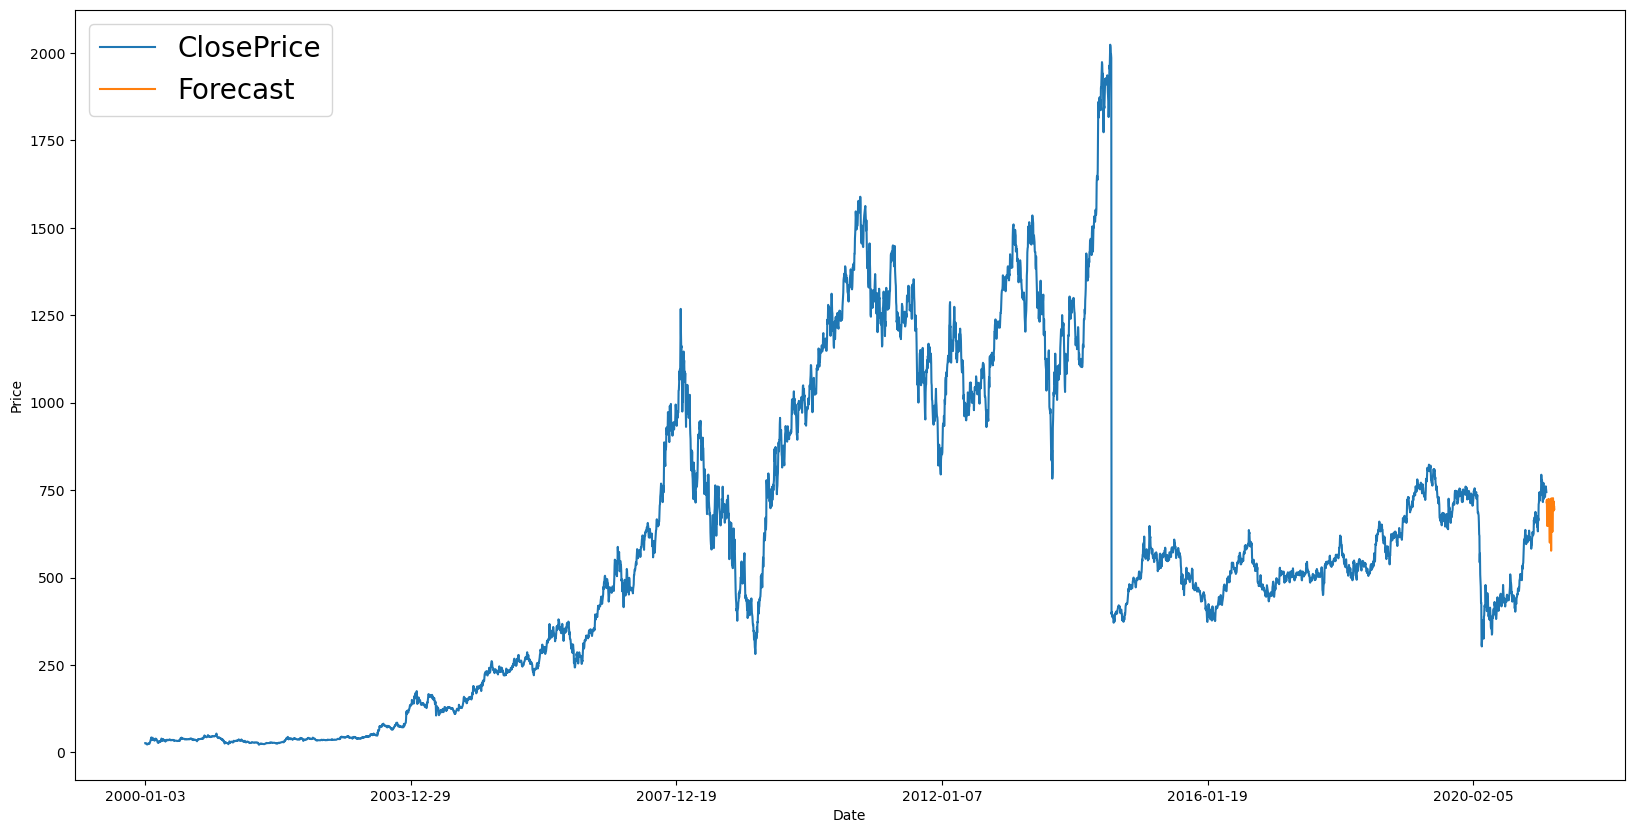

In [61]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')